### Matplotlib Object Oriented Programming Exercises

In this exercise we will write a class which will take a pandas dataframe and output a set of plots describing the dataframe. For this we will use data from http://earthquake.usgs.gov/ which maintains csv files corresponding to data of earthquake occurrences sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. The csv files are available here 

In [1]:
feed="http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

In [2]:
import numpy as np
import pandas as pd
#import urllib2
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Check if you have the updated version of Matplotlib i.e 1.5.0. If not you can udate it using linux command sudo pip install --upgrade matplotlib for unix boxes and corresponding brew command for mac

In [3]:
print mpl.__version__

2.0.0


### Acquiring Data ###

For this assignment we will be working with the following csv files

1. Significant earthquakes in the last 30 days : feed + "significant_month.csv"
2. Magnitude > 4.5 : feed + "4.5_month.csv"
3. Magnitude > 2.5 : feed + "2.5_month.csv"
4. Magnitude > 1.0 : feed + "1.0_month.csv"

### Q1 (answered)
Write a function which takes an integer input from 1 to 4 and outputs a pandas dataframe corresponding to the csv file above. Note that the function should necessarily download the data from the website via internet.

In [4]:
filenames=["significant_month.csv",
           "4.5_month.csv",
           "2.5_month.csv",
           "1.0_month.csv"]
def download_data(i):
    url=feed+filenames[i-1];
    print 'downloading',url
    return pd.read_csv(url);

In [5]:
last_30 = download_data(1)
data_45 = download_data(2)
data_25 = download_data(3)
data_10 = download_data(4)
last_30.head()

downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_month.csv


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-07-22T10:07:26.450Z,34.644500,46.178900,5.72,5.90,mb,NaN,30,0.60300,1.04,...,2018-07-24T16:57:18.621Z,"35km NE of Sarpol-e Zahab, Iran",earthquake,6.1,4.2,0.028,454,reviewed,us,us
1,2018-07-13T09:46:49.640Z,-18.933200,169.022400,169.16,6.40,mww,NaN,19,2.48500,0.76,...,2018-07-16T02:07:58.686Z,"72km NNW of Isangel, Vanuatu",earthquake,8.3,5.5,0.057,30,reviewed,us,us
2,2018-07-10T11:08:37.420Z,34.010833,-117.584667,4.31,3.57,ml,199.0,11,0.02013,0.23,...,2018-07-18T15:19:08.441Z,"6km SE of Ontario, CA",earthquake,0.1,0.3,0.176,345,reviewed,ci,ci
3,2018-07-07T11:23:50.080Z,35.112400,140.647500,40.00,5.90,mww,NaN,37,2.07100,0.99,...,2018-07-20T12:21:05.038Z,"28km ESE of Ohara, Japan",earthquake,6.3,1.9,0.061,26,reviewed,us,us


### Q2) Analyzing the data ###

In order to understand the data we will plot different attributes of the data using tools provided by matplotlib.
In order to do that, we will first create a class object for the given dataframe.

2.1) The class will have a set of functions to generate different plots. The first function will output a histogram taking column type as input. The column type is restricted to latitude or longitude. Take default interval size as 10 degrees

2.2) Write another function which when called will output a scatter plot of longitude vs. latitude. For extra credit represent each earthquake by a circle whose area is proporportional to the strength of the earthquake.

-179.9944 179.7972


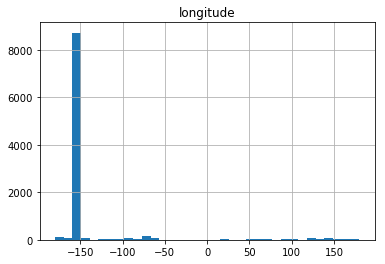

In [6]:
def DF_hist(df,col='longitude'):
    Min=df[col].min();
    Max=df[col].max();
    print Min,Max
    df.hist(column=col,bins=int((Max-Min)/10.0))
DF_hist(data_25)

In [7]:
class dataPlot(object):
    """dataPlot takes a pandas dataframe as input and outputs different plots correspondng to the input dataframe"""
    
    def __init__(self,df):
        """Initialize variables"""
        self.df = df
    
    '''
    2.1) The class will have a set of functions to generate different plots. 
    The first function will output a histogram taking column type as input. 
    The column type is restricted to latitude or longitude. Take default 
    interval size as 10 degrees
    '''
    def histogram(self,col):
        if col != 'latitude' and col != 'longitude':
            print 'col input must be latitude or longitude'
            return None
        Min=self.df[col].min();
        Max=self.df[col].max();
        self.df.hist(column=col,bins=int((Max-Min)/10.0))
        plt.title('Histogram of Earthquake Locations by ' + col)
        plt.show()
    
    '''
    2.2) Write another function which when called will output a scatter plot 
    of longitude vs. latitude. For extra credit represent each earthquake by 
    a circle whose area is proporportional to the strength of the earthquake.
    '''
    def scatter(self,col1,col2):
        if col1 != 'latitude' and col1 != 'longitude':
            print 'col1 input must be latitude or longitude'
            return None
        if col2 != 'latitude' and col1 != 'longitude':
            print 'col2 input must be latitude or longitude'
            return None
        x = self.df[col1].values
        y = self.df[col2].values
        mag = self.df['mag']
        plt.scatter(x, y, s = 3**mag, alpha = 0.25)
        plt.title('Scatter Plot of Earthquake Locations')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid()
        plt.show()

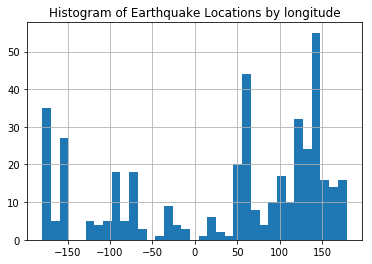

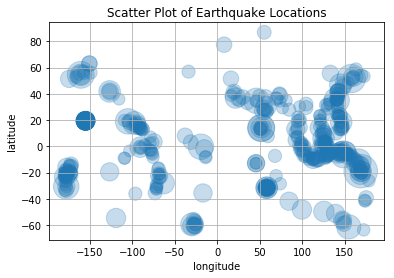

In [8]:
#The folloring command should now generate a histogram and a scatter-plot
D=dataPlot(data_45)
D.histogram('longitude')
D.scatter('longitude','latitude')

### Q3) Plotting data on the map ###

In the last class we had used basemap to plot the weather data. Now we will use basemap to plot the earthquake data, and further enhance it with a rain animation to indicate the severity of the incident. We will start initially with the dataset corresponding to earthquakes magnitude > 4.5

In [9]:
data_45 = download_data(2)

downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv


First we will import necessary libraries

In [ ]:
from mpl_toolkits.basemap import Basemap

Next we will generate a figure canvas with a basemap projection. We will use the 'mill' projection of Basemap for this assignment. 

In [ ]:
#General plot  initializations
fig = figure(figsize=(14,10))
ax = subplot(1,1,1)
earth = Basemap(projection='mill')
# We then draw coastlines and continents
earth.drawcoastlines(color='0.50', linewidth=0.25);
earth.fillcontinents(color='0.95');

### Q3) 

Consult the documentation about scatterplots on maps:
```
http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter
```
write a function that takes as input a dataframe and plots a map and on top of the map a circle at the location of each earthquake in the dataframe.

Use size to convey the intensity of each earthquake. Make the the circles semi-transparent so that the intensity of the color conveys the number of earthquakes that have occured.

Finally wrap the function in a class that has methods for plotting an array of scatterplots from the same data-frame, each for a different time period.

In [ ]:
'''
Write a function that takes as input a dataframe and plots a map and on top 
of the map a circle at the location of each earthquake in the dataframe.
Use size to convey the intensity of each earthquake. Make the the circles 
semi-transparent so that the intensity of the color conveys the number of 
earthquakes that have occured.
'''
def mag_scale(mag):
    '''Function to create legend of earthquake magnitudes.'''
    # Legend approach uses info from links below:
    # http://stackoverflow.com/questions/40184091/matplotlib-basemap-plotting-legend-corresponding-to-size-of-points-on-map
    # http://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
    return plt.Line2D((0,), (0,), color='b', marker='o',
                      ms=(3**mag)**0.5, alpha=0.25, linestyle='')

def quake_plot(df, fig=None, ax=None):
    '''Function to plot earthquake locations'''
    # set fig and ax if None
    if fig is None:
        fig = figure(figsize=(14,10))
    if ax is None:
        ax = subplot(1,1,1)
        ax.set_title('Earthquake Locations and Intensities')
    
    # draw map
    earth = Basemap(projection='mill')
    earth.drawcoastlines(color='0.50', linewidth=0.25)
    earth.fillcontinents(color='0.95', zorder=0)
    
    # map longitude and latitude, extract magnitude values
    lon, lat = earth(df['longitude'].values, df['latitude'].values)
    mag = df.mag.values
    
    # add scatter plot to map
    earth.scatter(lon, lat, s = 3**mag, c = 'b', marker = 'o', alpha = 0.15)

    ## create a legend
    # extract earthquake magnitudes and calculate min, midpoint, and max
    mag = df['mag'].values
    min_mag = round(min(mag),1)
    max_mag = round(max(mag),1)
    mid_mag = round((min_mag + max_mag)/2.0, 1)
    magnitudes = [min_mag, mid_mag, max_mag]

    # set position of legend box
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # create legend dots from mag_scale(mag) function
    legend_dots = [mag_scale(m) for m in magnitudes]
    labels = ["Magnitude %.1f" % m for m in magnitudes]

    # add legend
    ax.legend(legend_dots, labels, loc='upper center',
              bbox_to_anchor=(0.5, 0.1), ncol=5)
    
    plt.show()

In [ ]:
# testing quake_plot function
quake_plot(data_45)

In [ ]:
import datetime as dt
'''
Finally wrap the function in a class that has methods for plotting an array of 
scatterplots from the same data-frame, each for a different time period.
'''
class QuakeMaps:
    
    def __init__(self, data):
        self.data = data
    
    def mag_scale(self, mag):
        '''Function to create legend of earthquake magnitudes.'''
        # Legend approach uses info from links below:
        # http://stackoverflow.com/questions/40184091/matplotlib-basemap-plotting-legend-corresponding-to-size-of-points-on-map
        # http://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
        return plt.Line2D((0,), (0,), color='b', marker='o', 
                          ms=(3**mag)**0.5, alpha=0.25, linestyle='')

    def quake_plot(self, df=None, fig=None, ax=None):
        '''Function to create a single plot of earthquake locations.'''
        # set df, fig, and ax if None
        if df is None:
            df = self.data
        if fig is None:
            fig = figure(figsize=(14,10))
        if ax is None:
            ax = subplot(1,1,1)
            ax.set_title('Earthquake Locations and Intensities')
        
        # draw map
        earth = Basemap(projection='mill')
        earth.drawcoastlines(color='0.50', linewidth=0.25)
        earth.fillcontinents(color='0.95', zorder=0)

        # map longitude and latitude, extract magnitude values
        lon, lat = earth(df['longitude'].values, df['latitude'].values)
        mag = df.mag.values

        # add scatter plot to map
        qplot = earth.scatter(lon, lat, s = 3**mag, c = 'b', marker = 'o', alpha = 0.15)
        
        ## create a legend
        # extract earthquake magnitudes and calculate min, midpoint, and max
        mag = df['mag'].values
        min_mag = round(min(mag),1)
        max_mag = round(max(mag),1)
        mid_mag = round((min_mag + max_mag)/2.0, 1)
        magnitudes = [min_mag, mid_mag, max_mag]

        # set position of legend box
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

        # create legend dots from mag_scale(mag) function
        legend_dots = [mag_scale(m) for m in magnitudes]
        labels = ["Magnitude %.1f" % m for m in magnitudes]

        # add legend
        ax.legend(legend_dots, labels, loc='upper center',
                  bbox_to_anchor=(0.5, 0.1), ncol=5)

        return qplot
    
    def plot_weekly(self):
        '''Function to create weekly plots from earthquake data'''
        df = self.data
        
        # extract date info from 'time' column
        datetimes = map(lambda x: x[:-5], df['time'].values)
        df['date'] = pd.to_datetime(datetimes, format = '%Y-%m-%dT%H:%M:%S')
        df['date'] = df['date'].dt.date

        # specify date ranges for subsetting rows of the dataframe
        date_ranges = [
            (dt.date(2016,10,13), dt.date(2016,10,19)),
            (dt.date(2016,10,20), dt.date(2016,10,26)),
            (dt.date(2016,10,27), dt.date(2016,11,2)),
            (dt.date(2016,11,3), dt.date(2016,11,9)),
            (dt.date(2016,11,10), dt.date(2016,11,16))
        ]

        # populate list of dataframes corresponding to date ranges
        df_list = []
        for i in range(len(date_ranges)):
            start_date = date_ranges[i][0]
            end_date = date_ranges[i][1]
            tmp_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
            df_list.append(tmp_df)

        num_plots = len(df_list)
        
        # create figure and axes
        fig, ax = plt.subplots(num_plots, 1, figsize = (14*num_plots,10*num_plots))
        
        # loop through axes to create subplots corresponding to date ranges
        for i in range(num_plots):
            # create subplot title
            start_date = str(date_ranges[i][0])
            end_date = str(date_ranges[i][1])
            title = 'Earthquakes from ' + start_date + ' to ' + end_date

            # set axes and title
            ax[i] = subplot(num_plots,1,i+1)
            ax[i].set_title(title)
            
            # create plot via quake_plot method
            self.quake_plot(df_list[i], fig, ax[i])
            
        plt.show()

In [ ]:
# testing QuakeMaps class
q = QuakeMaps(data_10)
q.quake_plot()
q.plot_weekly()